# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
fetch_btc = requests.get(btc_url)
current_btc_price = fetch_btc.json()

# Fetch current ETH price
fetch_eth = requests.get(eth_url)
current_eth_price = fetch_eth.json()

# Compute current value of my crpto
my_btc_value = current_btc_price ["data"]["1"]["quotes"]["USD"]["price"] * my_btc
my_eth_value = current_eth_price ["data"]["1027"]["quotes"]["USD"]["price"] * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $60746.40
The current value of your 5.3 ETH is $23385.24


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Create the Alpaca API object
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Set Alpaca API key and secret
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-12-06", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df
# Preview DataFrame
ticker_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-12-06 00:00:00-05:00  114.98  115.0391  114.6196  114.66  6364620   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2021-12-06 00:00:00-05:00  456.14  460.79  453.56  458.78  88930961

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(ticker_data["AGG"]["close"])
spy_close_price = float(ticker_data["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.66
Current SPY closing price: $458.78


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22939.00
The current value of your 200 AGG shares is $22932.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_eth_value + my_btc_value
shares = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame([crypto, shares],index = ["crypto", "shares"], columns = ["amount"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,84131.643
shares,45871.000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

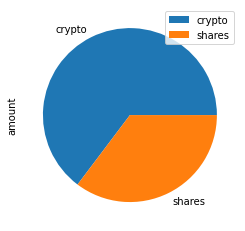

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", subplots=True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = (sum(df_savings["amount"]))

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulating the person for having enough money in this fund.")
elif total_savings == emergency_fund:
    print("Congratulating the person on reaching financial goal.")
elif total_savings < emergency_fund:
    print("$ away from reaching your goal.")

Congratulating the person for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

In [17]:
# Printing the simulation input data
mc_tickers = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_tickers.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\desai\UTOR-VIRT-FIN-PT-11-2021-U-C\05-APIs\Unit 5 Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001962,1.007742,0.989687,0.999507,1.000684,1.008639,0.995795,0.994923,1.007118,0.993411,...,1.004192,1.000555,1.001475,1.002899,1.000319,0.998138,0.984510,1.003528,0.992687,1.002331
2,1.005517,1.008059,0.976389,0.992844,1.002385,1.020657,1.005248,0.987521,1.005217,0.986236,...,1.015354,1.004471,1.003427,1.000874,1.004600,0.990836,0.980885,1.007778,0.995382,1.009740
3,1.006437,1.006834,0.975876,0.987723,0.999740,1.017327,1.010070,0.992417,0.999011,0.983122,...,1.020689,1.001354,1.006062,1.012118,1.006939,0.990366,0.971827,1.006105,0.995652,1.010794
4,1.009187,1.004176,0.977940,0.983644,1.007675,1.026640,1.012345,1.003405,0.994836,0.993863,...,1.010660,0.993245,0.999567,1.005453,1.007481,0.984703,0.978548,1.002239,0.984507,1.006639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.418258,17.238539,12.462964,17.455115,18.068863,15.097564,5.530869,25.480200,9.865427,11.207444,...,6.968329,3.268556,23.573618,13.147991,19.212193,24.712327,13.824902,17.743397,49.967393,10.158150
7557,20.543696,17.203217,12.425904,17.494914,18.180202,15.328767,5.478340,25.743887,9.897357,11.195196,...,6.997046,3.285677,23.567159,13.168498,19.117618,24.536439,13.812070,17.754205,49.470287,10.103175
7558,20.428965,17.239937,12.536967,17.398357,18.172978,15.451147,5.472256,25.933223,9.764547,11.271653,...,7.053912,3.263469,23.601753,13.256631,19.058475,24.450579,13.821868,17.759240,49.472970,10.208783
7559,20.330102,17.228795,12.654965,17.329804,18.167188,15.543616,5.480082,25.771624,9.870666,11.348540,...,6.995950,3.242333,23.765967,13.199694,19.007191,24.395791,13.923193,17.597784,49.668157,10.145575


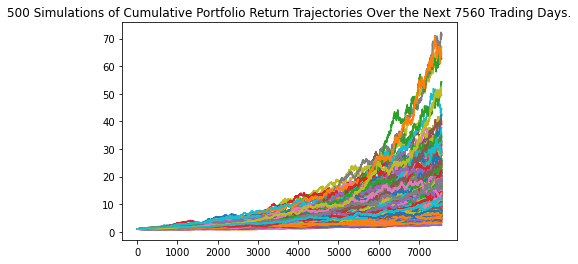

In [19]:
# Plot simulation outcomes
line_plot = mc_tickers.plot_simulation()

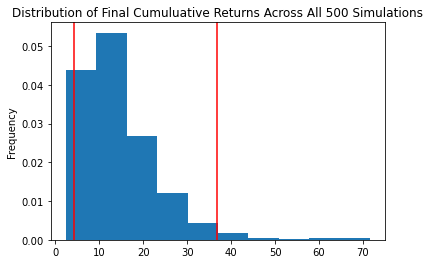

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = mc_tickers.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_results = mc_tickers.summarize_cumulative_return()
# Print summary statistics
print(simulated_results)

count           500.000000
mean             14.612262
std               9.328362
min               2.391677
25%               8.190469
50%              12.448034
75%              18.397647
max              71.633231
95% CI Lower      4.221329
95% CI Upper     36.716818
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(simulated_results[8]*20000)
ci_upper = round(simulated_results[9]*20000)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $84427 and $734336


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(simulated_results[8]*30000)
ci_upper = round(simulated_results[9]*30000)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $126640 and $1101505


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")